# Applicant Loan Default Prediction

Limitation: The dataset lacks information regarding the specific purpose for which the loan funds were utilized.

In [14]:
# Import the python libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
# wrangle function

def wrangle(filepath):
    #load the dataset
    df=pd.read_csv(filepath)
    
    # Reaplace the status values
    df["Status"].replace({"Y": 1, "N": 0}, inplace=True)
    
    # change the datatype
    df["Status"] = df["Status"].astype(int)
    
     # drop na values
    df = df.dropna()
    
    # using list comprehension for dependents colums
    df["Dependents"] = [v[1] for v in df["Dependents"].str.split("") ]
    #df["Dependents"]=df["Dependents"].astype(int)
   
    
    return df

In [85]:
# loading the wrangle function.

df = wrangle("loan_train.csv")

In [86]:
# Examine the dataset

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1


In [173]:
#df["Applicant_Income"] / df["Loan_Amount"]

In [87]:
# Examine the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    int32  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 48.7+ KB


In [81]:
# Descriptive Statistics

df.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Status
count,499.000000,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,499.000000,499.000000
mean,0.779559,5.336128e+05,1.566996e+05,1.395251e+07,342.012024,0.851703,0.683367
std,1.021605,5.618157e+05,2.580955e+05,8.345237e+06,64.860368,0.355750,0.465630
min,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,36.000000,0.000000,0.000000
25%,0.000000,2.885500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000,0.000000
50%,0.000000,3.859000e+05,1.086000e+05,1.260000e+07,360.000000,1.000000,1.000000
75%,2.000000,5.825000e+05,2.251500e+05,1.665000e+07,360.000000,1.000000,1.000000
max,3.000000,8.100000e+06,3.383700e+06,6.000000e+07,480.000000,1.000000,1.000000


## Exploratory Analysis

0.472393846683149


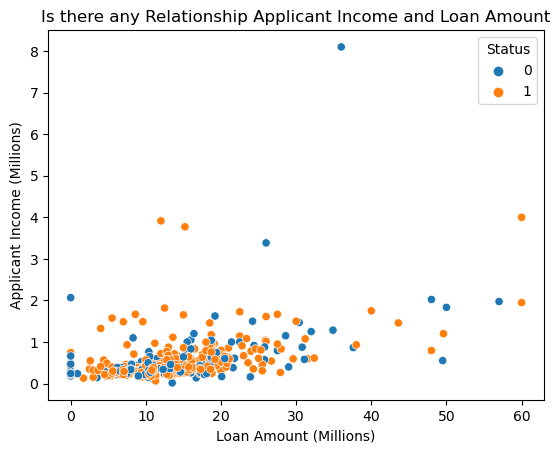

In [183]:
# sccatter the two income
sns.scatterplot(y=df["Applicant_Income"] / 1e6, x=df["Loan_Amount"] /1e6, hue=df["Status"]);

print(df["Applicant_Income"].corr(df["Loan_Amount"]))

plt.ylabel("Applicant Income (Millions)")
plt.xlabel("Loan Amount (Millions)")
plt.title("Is there any Relationship Applicant Income and Loan Amount");

The chart shows the relationship between applicant income and loan amount, as well as the status of loan repayment. It seems that people with low income borrowed more than their income and had a higher chance of defaulting on their loan. 
Also, 68% percent of the applicant falied to repay their loan. Their is a positive relationship with applicant income and loan amount of 0.47


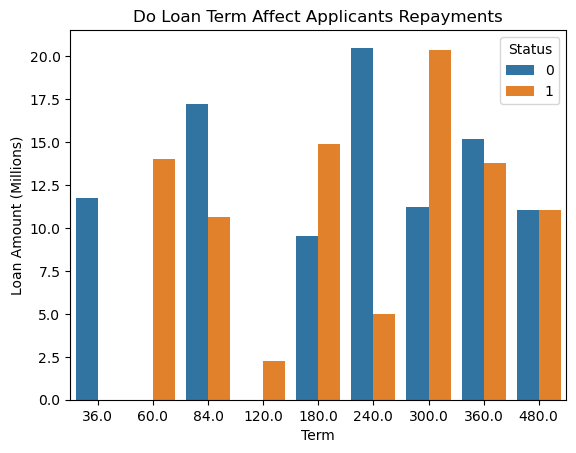

In [182]:
# Do Loan Term Affect Applicants Repayments
sns.barplot(x=df["Term"], y=df["Loan_Amount"]/ 1e6, hue=df["Status"], errorbar=None);

plt.xlabel("Term")
plt.ylabel("Loan Amount (Millions)")
plt.title("Do Loan Term Affect Applicants Repayments");


The chart shows the effect of loan term on applicants’ repayments. It seems that none of the applicants who took loans for 36 days defaulted on their repayments, while there were defaults for all other loan terms except 480. The 360-day and 240-day loan terms had a balance between defaulters and non-defaulters, while the 60-day and 120-day loan terms had mostly defaulters.

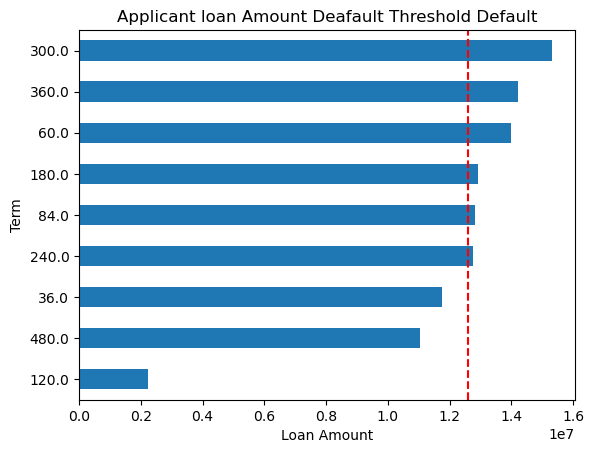

In [180]:
# Applicant Threshold default

bandry = np.percentile(df["Loan_Amount"],50)

# Create pivot table
loan_pivot = pd.pivot_table(
    df, index= "Term", values= "Loan_Amount"
).sort_values(by="Loan_Amount")

# Plot bar chart of `foundation_pivot`
loan_pivot.plot(kind="barh", legend =None)

plt.axvline(
    averag, linestyle="--", color="red", label="averag"
);

plt.ylabel("Term")
plt.xlabel("Loan Amount")
plt.title("Applicant loan Amount Deafault Threshold Default");

The chart shows the applicant loan amount default threshold for different loan terms. It seems that when applicants borrow more than $12M, they have a higher chance of defaulting on their payments, regardless of the loan term. 

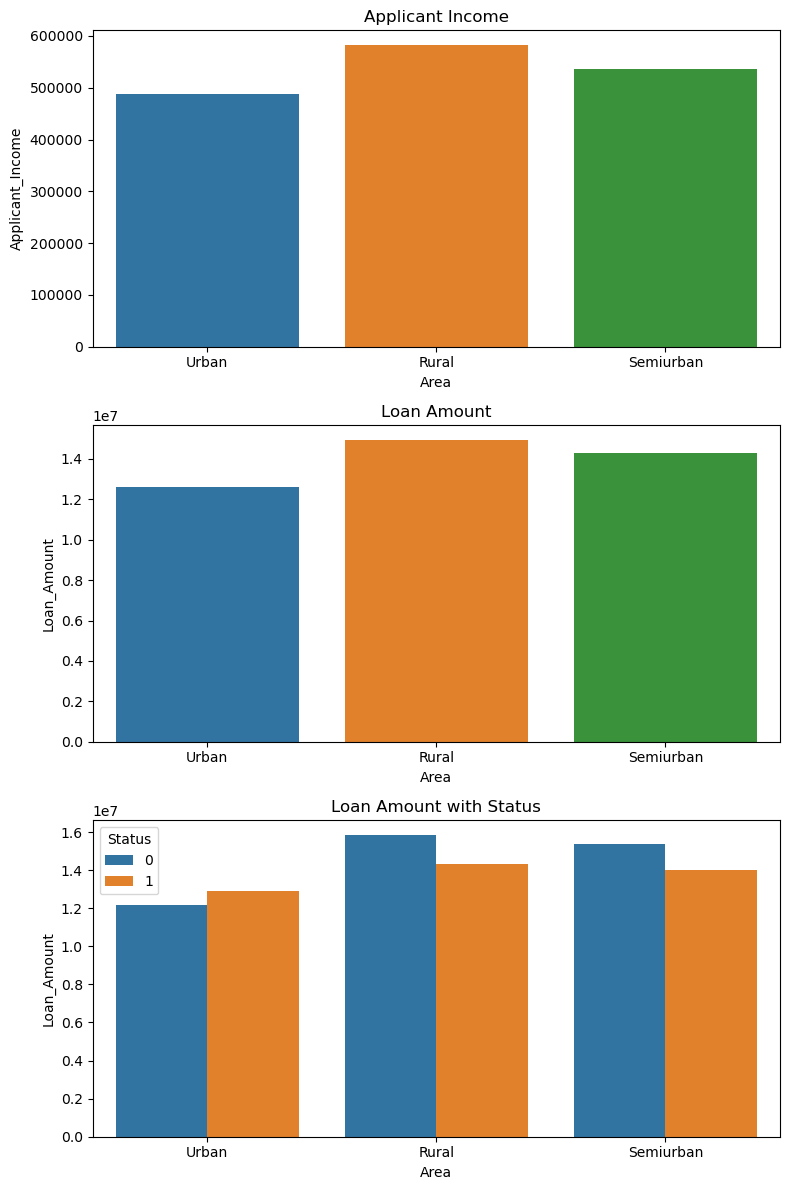

In [185]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot the first bar plot
sns.barplot(x=df['Area'], y=df['Applicant_Income'], errorbar=None, ax=axes[0])
axes[0].set_title('Applicant Income')

# Plot the second bar plot
sns.barplot(x=df['Area'], y=df['Loan_Amount'], errorbar=None, ax=axes[1])
axes[1].set_title('Loan Amount')

# Plot the third bar plot
sns.barplot(x=df['Area'], y=df['Loan_Amount'], hue=df['Status'], errorbar=None, ax=axes[2])
axes[2].set_title('Loan Amount with Status')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



The plot also shows that people from the rural area with higher income tend to borrow more loan, followed by the semi-urban area.

From the plot, applicants from rural area have more income compared to urban and semi-urban areas, and a larger portion of people with high income in the rural area tend not to default in repayments.


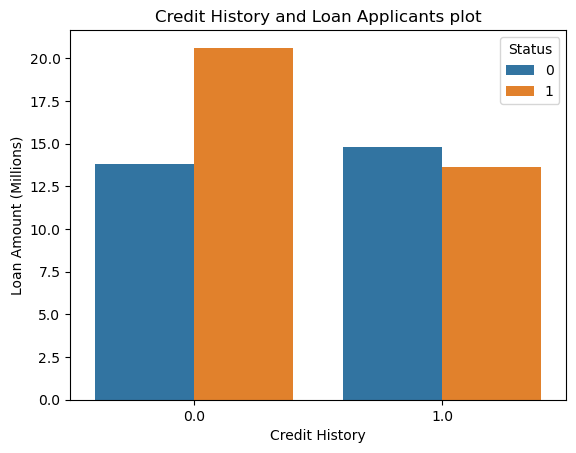

In [187]:
# Credit History and Loan Applicants Form
sns.barplot(x=df["Credit_History"], y=df["Loan_Amount"]/1e6, hue=df["Status"],  errorbar=None);

plt.xlabel("Credit History")
plt.ylabel("Loan Amount (Millions)")
plt.title("Credit History and Loan Applicants plot");



The chart shows the credit history and loan applicants plot. The plot shows that applicants with no credit history have a higher tendency to default, compared to those with credit history.

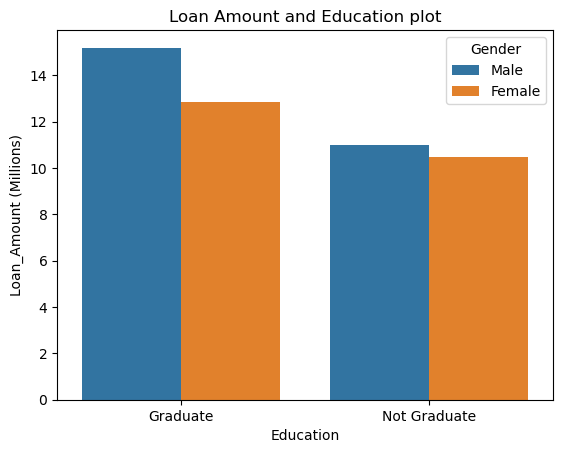

In [193]:
# who borrows more loan, gender, graduate or not

sns.barplot(x=df["Education"],  y=df["Loan_Amount"]/1e6,hue=df["Gender"] , errorbar=None);

plt.xlabel("Education")
plt.ylabel("Loan_Amount (Millions)")
plt.title("Loan Amount and Education plot");

The plot illustrates that graduate applicants tend to borrow a larger amount of money, and it also highlights that a significant portion of the graduate applicants are male.

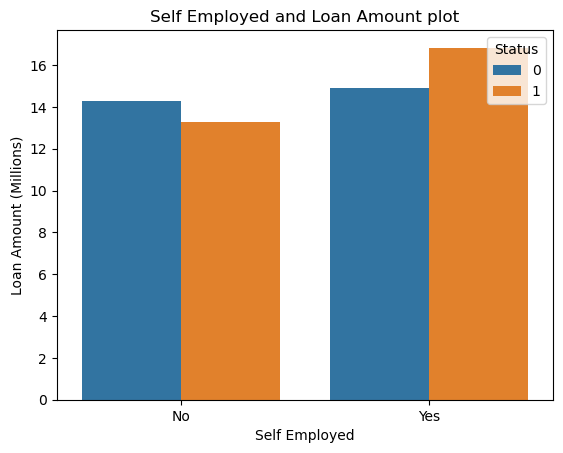

In [198]:
# self employed to loan amount and default in payment
sns.barplot(x="Self_Employed",  y=df["Loan_Amount"]/1e6 ,hue="Status", data=df, errorbar=None);

plt.xlabel("Self Employed")
plt.ylabel("Loan Amount (Millions)")
plt.title("Self Employed and Loan Amount plot");


Individuals who are self-employed generally borrow larger loan amounts and constitute a higher proportion of applicants who default on payments.

### FINDINGS:

* The chart indicates that people with lower incomes borrowed more than their income, leading to a higher chance of loan default.


* Approximately 68% of the applicants failed to repay their loans.

* There is a positive relationship of 0.47 between applicant income and loan amount.

* Loan term significantly impacts repayments. No defaults were observed for a 36-day term, and all other terms except 480 days had defaults.

* Borrowing more than 12M increased the likelihood of default, irrespective of the loan term.

* Rural applicants with higher incomes tended to borrow more than those in urban and semi-urban areas.

* Rural areas exhibited higher income levels compared to urban and semi-urban areas.

* A significant portion of high-income individuals in rural areas tended not to default on their loans.

* Applicants with no credit history had a higher tendency to default compared to those with a credit history.

* Graduates tended to borrow larger amounts, and a substantial portion of graduate applicants were male.

* Self-employed individuals tended to borrow larger amounts and constituted a higher proportion of loan defaulters.


## Recomendtaion:

1. **Discounted Interest Rates for Early Repayment:**
   - Implement a discounted interest rate system to incentivize early repayment.
   - Reduce the interest rate by a certain percentage for borrowers who repay their loans ahead of schedule.
   - This strategy can encourage responsible financial behavior and improve overall repayment rates.

2. **Loan Eligibility Amount Test:**
   - Establish a loan eligibility amount test to assess the appropriate loan amount for each applicant.
   - Consider factors such as the applicant's area of residence and the number of dependents.
   - Adjust the loan amount based on the identified criteria to ensure that borrowers receive loans that align with their financial capacity.

3. **Customized Loan Terms:**
   - Explore the possibility of offering customized loan terms based on individual financial profiles.
   - Tailor loan terms to better suit the specific needs and circumstances of each borrower, increasing the likelihood of successful repayment.

4. **Credit History Assessment:**
   - Strengthen the assessment of credit history as a key factor in loan approval.

5. **Regular Loan Reviews and Adjustments:**
   - Establish a system for regular reviews of loan performance metrics.
   - Use the gathered data to make informed adjustments to lending practices, ensuring alignment with the financial well-being of both borrowers and the lending institution.


#### WHAT NEXT: 
We are going to create a machine learning model to predict the loan default applicants

<Axes: >

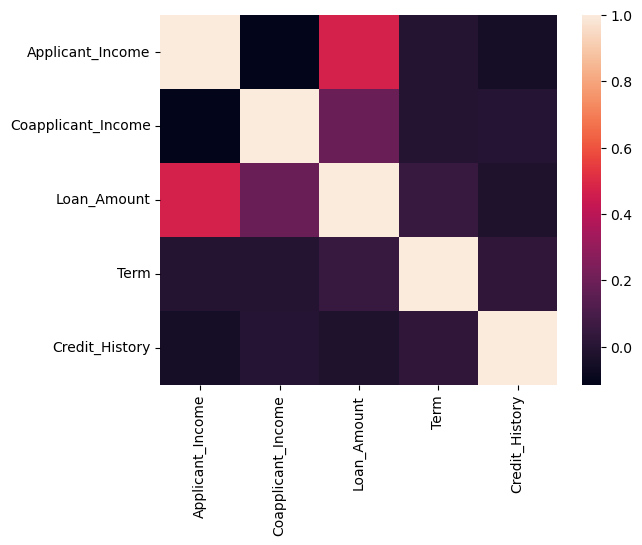

In [223]:
corr = df.select_dtypes("number").drop(columns="Status").corr()
sns.heatmap(corr)

In [209]:
# BaseLine  Value

df["Status"].value_counts(normalize=True).max()

0.6833667334669339

### Train / Test Split

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

In [206]:
# split 
y = df["Status"]
x = df.drop(columns=["Status"])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [219]:
# model pipeline
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression()
    

)

model.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed', 'Area'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [230]:
# Accuracy Score

accuracy_train = model.score(x_train, y_train)
accuracy_test = model.score(x_test, y_test)

print("Accuracy Train", round(accuracy_train, 2))
print("Accuracy Test", round(accuracy_test, 2))

Accuracy Train 0.69
Accuracy Test 0.65


In [248]:
# import the test data.
test = pd.read_csv("loan_test.csv").dropna()
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban


In [254]:
test.shape

(293, 11)

In [250]:
# make prediction

model.predict(test)[:5]

array([1, 1, 1, 1, 1])

In [251]:
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

C:\ProgramData\anaconda3\Lib\site-packages\category_encoders\utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


<Axes: >

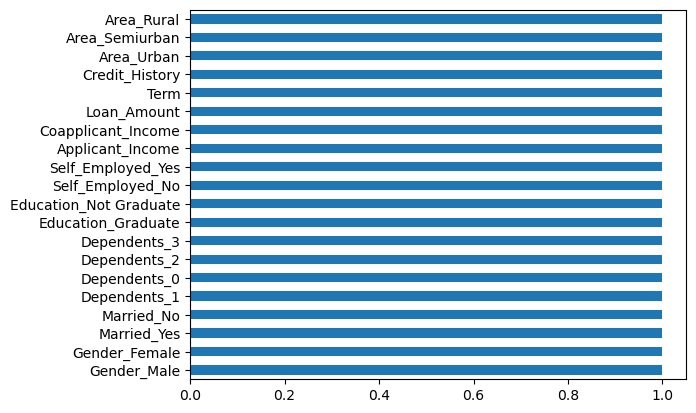

In [252]:
# Odd ratio

odd_ratio = pd.Series(np.exp(importances), index=features)
odd_ratio.plot(kind="barh")

They all have equal contribution

 I am not pleased with the plot above and the model accuracy score. With this, I had the intention to check out decision tree. However, their is no enough observations to evaluate the perfromace of this model.